In [27]:
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('sya-nobel-prize-winners/data/nobel_prize_by_winner.csv')
nobel = nobel[nobel['born'].notna()]

nobel.head(5)

,id,firstname,surname,born,died,borncountry,borncountrycode,borncity,diedcountry,diedcountrycode,diedcity,gender,year,category,overallmotivation,share,motivation,name,city,country
0,578,Rudolf Christoph,Eucken,01/05/1846,9/14/2026,East Friesland (now Germany),DE,Aurich,Germany,DE,Jena,male,1908,literature,NaN,1,"""in recognition of his earnest search for trut...",NaN,NaN,NaN
1,337,Joseph,Erlanger,01/05/1874,12/5/1965,USA,US,"San Francisco, CA",USA,US,"St. Louis, MO",male,1944,medicine,NaN,2,"""for their discoveries relating to the highly ...",Washington University,"St. Louis, MO",USA
2,506,Emily Greene,Balch,01/08/1867,1/9/1961,USA,US,"Jamaica Plain, MA (now Boston)",USA,US,"Cambridge, MA",female,1946,peace,NaN,2,NaN,NaN,NaN,NaN
3,62,Walther,Bothe,01/08/1891,2/8/1957,Germany,DE,Oranienburg,West Germany (now Germany),DE,Heidelberg,male,1954,physics,NaN,2,"""for the coincidence method and his discoverie...",University of Heidelberg,Heidelberg,Federal Republic of Germany
4,62,Walther,Bothe,01/08/1891,2/8/1957,Germany,DE,Oranienburg,West Germany (now Germany),DE,Heidelberg,male,1954,physics,NaN,2,"""for the coincidence method and his discoverie...",Max-Planck-Institut f�r medizinische Forschung,Heidelberg,Federal Republic of Germany


In [28]:
# Calculate portion of USA born winners per decade
nobel['usa_born_winner'] = nobel['borncountry'] == 'USA'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10)
proportion_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

display(proportion_usa_winners)

,decade,usa_born_winner
0,1900.0,0.017544
1,1910.0,0.078947
2,1920.0,0.074074
3,1930.0,0.245902
4,1940.0,0.309524
5,1950.0,0.282051
6,1960.0,0.280000
7,1970.0,0.311321
8,1980.0,0.322917
9,1990.0,0.403846


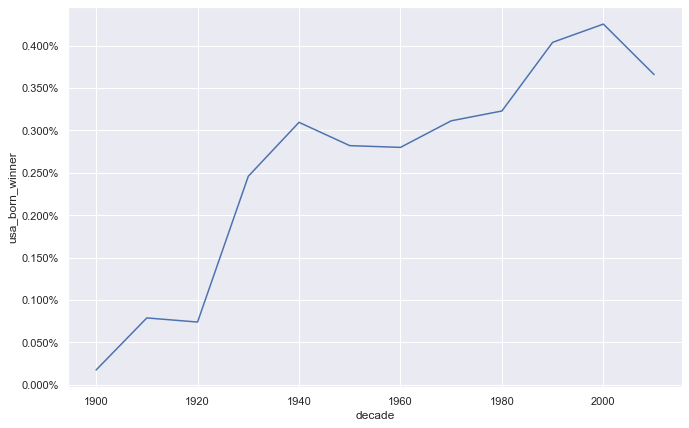

In [29]:
# Visualize USA proportion
sns.set()

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

ax = sns.lineplot(data=proportion_usa_winners, x='decade', y='usa_born_winner')

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

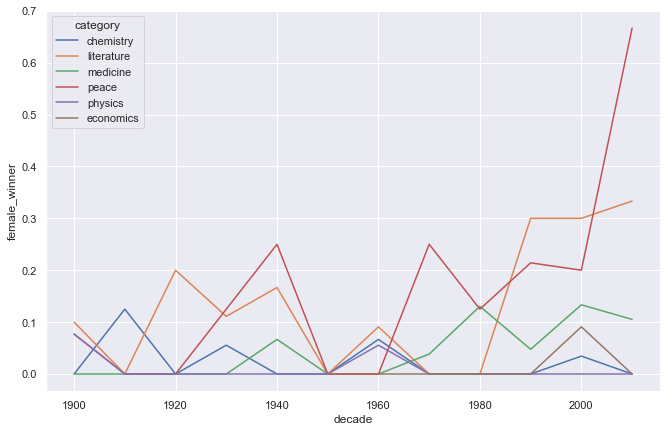

In [30]:
# Calculate proportion of female winners
nobel['female_winner'] = nobel['gender'] == 'female'
proportion_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

ax = sns.lineplot(data=proportion_female_winners, x='decade', y='female_winner', hue='category')

In [31]:
# First woman to receive nobel prize
nobel[nobel['female_winner'] == True].nsmallest(1, 'year')

,id,firstname,surname,born,died,borncountry,borncountrycode,borncity,diedcountry,diedcountrycode,...,category,overallmotivation,share,motivation,name,city,country,usa_born_winner,decade,female_winner
363,6,Marie,"Curie, n_e Sklodowska",11/07/1867,7/4/1934,Russian Empire (now Poland),PL,Warsaw,France,FR,...,physics,NaN,4,"""in recognition of the extraordinary services ...",NaN,NaN,NaN,False,1900.0,True


In [32]:
# Repeat winners (laureates)
nobel['full_name'] = nobel['firstname'] + ' ' + nobel['surname']
nobel.groupby('full_name').filter(lambda group: len(group) >= 2)

,id,firstname,surname,born,died,borncountry,borncountrycode,borncity,diedcountry,diedcountrycode,...,overallmotivation,share,motivation,name,city,country,usa_born_winner,decade,female_winner,full_name
3,62,Walther,Bothe,01/08/1891,2/8/1957,Germany,DE,Oranienburg,West Germany (now Germany),DE,...,NaN,2,"""for the coincidence method and his discoverie...",University of Heidelberg,Heidelberg,Federal Republic of Germany,False,1950.0,False,Walther Bothe
4,62,Walther,Bothe,01/08/1891,2/8/1957,Germany,DE,Oranienburg,West Germany (now Germany),DE,...,NaN,2,"""for the coincidence method and his discoverie...",Max-Planck-Institut f�r medizinische Forschung,Heidelberg,Federal Republic of Germany,False,1950.0,False,Walther Bothe
16,328,William Parry,Murphy,02/06/1892,10/9/1987,USA,US,"Stoughton, WI",USA,US,...,NaN,3,"""for their discoveries concerning liver therap...",Peter Brent Brigham Hospital,"Boston, MA",USA,True,1930.0,False,William Parry Murphy
17,328,William Parry,Murphy,02/06/1892,10/9/1987,USA,US,"Stoughton, WI",USA,US,...,NaN,3,"""for their discoveries concerning liver therap...",Harvard University,"Cambridge, MA",USA,True,1930.0,False,William Parry Murphy
20,356,John Franklin,Enders,02/10/1897,9/8/1985,USA,US,"West Hartford, CT",USA,US,...,NaN,3,"""for their discovery of the ability of poliomy...",Harvard Medical School,"Boston, MA",USA,True,1950.0,False,John Franklin Enders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,270,Johann,Deisenhofer,9/30/1943,0000-00-00,Germany,DE,Zusamaltheim,NaN,NaN,...,NaN,3,"""for the determination of the three-dimensiona...",Howard Hughes Medical Institute,NaN,NaN,False,1980.0,False,Johann Deisenhofer
912,789,Barry J.,Marshall,9/30/1951,0000-00-00,Australia,AU,Kalgoorlie,NaN,NaN,...,NaN,2,"""for their discovery of the bacterium <i>Helic...","NHMRC Helicobacter pylori Research Laboratory,...",Nedlands,Australia,False,2000.0,False,Barry J. Marshall
913,789,Barry J.,Marshall,9/30/1951,0000-00-00,Australia,AU,Kalgoorlie,NaN,NaN,...,NaN,2,"""for their discovery of the bacterium <i>Helic...",University of Western Australia,Perth,Australia,False,2000.0,False,Barry J. Marshall
917,875,Shinya,Yamanaka,9/4/1962,0000-00-00,Japan,JP,Osaka,NaN,NaN,...,NaN,2,"""for the discovery that mature cells can be re...",Kyoto University,Kyoto,Japan,False,2010.0,False,Shinya Yamanaka


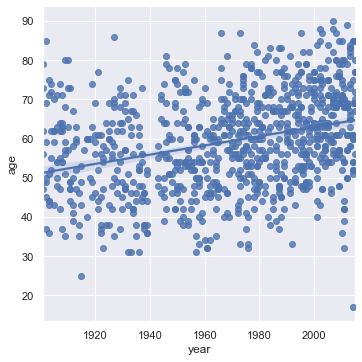

In [35]:
# Average ages of winners
nobel['born'] = pd.to_datetime(nobel['born'], format="%m/%d/%Y")
nobel['age'] = nobel['year'] - nobel['born'].dt.year

sns.lmplot(data = nobel, x='year', y='age')

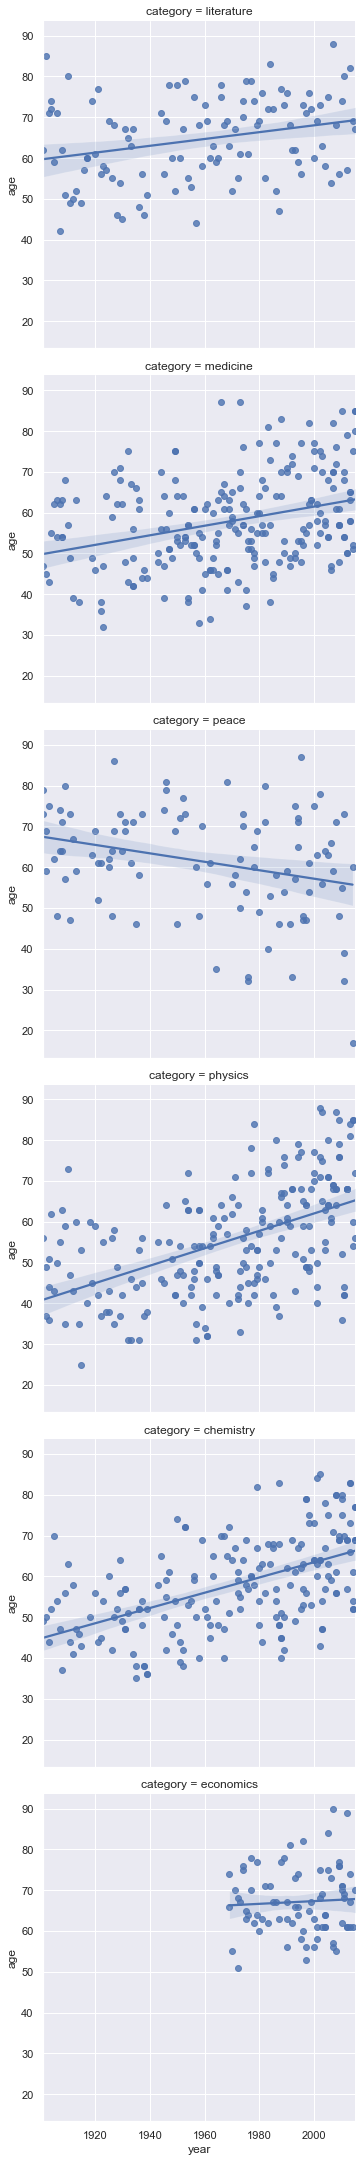

In [36]:
# For each Category
sns.lmplot(data=nobel, x='year', y='age', row='category')

In [37]:
# Oldest and youngest
display(nobel.nlargest(1, 'age'))
display(nobel.nsmallest(1, 'age'))

,id,firstname,surname,born,died,borncountry,borncountrycode,borncity,diedcountry,diedcountrycode,...,share,motivation,name,city,country,usa_born_winner,decade,female_winner,full_name,age
840,820,Leonid,Hurwicz,1917-08-21,6/24/2008,Russia,RU,Moscow,USA,US,...,3,"""for having laid the foundations of mechanism ...",University of Minnesota,"Minneapolis, MN",USA,False,2000.0,False,Leonid Hurwicz,90


,id,firstname,surname,born,died,borncountry,borncountrycode,borncity,diedcountry,diedcountrycode,...,share,motivation,name,city,country,usa_born_winner,decade,female_winner,full_name,age
779,914,Malala,Yousafzai,1997-07-12,0000-00-00,Pakistan,PK,Mingora,NaN,NaN,...,2,"""for their struggle against the suppression of...",NaN,NaN,NaN,False,2010.0,True,Malala Yousafzai,17
